In [1]:
# ===============================
# STEP 1: IMPORT LIBRARIES
# ===============================
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
# ===============================
# STEP 2: LOAD DATASET
# ===============================
img_size = (180, 180)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
   data_test_path,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Classes: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [4]:
# ===============================
# STEP 3: PREFETCH FOR PERFORMANCE
# ===============================
#This speeds up training by prefetching images while the model trains
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [5]:
# ===============================
# STEP 4: BASELINE MODEL
# ===============================
baseline_model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180,180,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_baseline = baseline_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


C:\Users\Baha\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 110s 842ms/step - accuracy: 0.0982 - loss: 3.5321 - val_accuracy: 0.2707 - val_loss: 2.4556
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 781ms/step - accuracy: 0.2703 - loss: 2.5155 - val_accuracy: 0.5385 - val_loss: 1.5793
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 711ms/step - accuracy: 0.5005 - loss: 1.8012 - val_accuracy: 0.8148 - val_loss: 0.7566
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 715ms/step - accuracy: 0.7596 - loss: 0.8954 - val_accuracy: 0.9031 - val_loss: 0.4043
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 892ms/step - accuracy: 0.9185 - loss: 0.3465 - val_accuracy: 0.9345 - val_loss: 0.2990
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9679 - loss: 0.1672 - val_accuracy: 0.9630 - val_loss: 0.1998
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9820 - loss: 0.1099 - val_accuracy: 0.9544 - val_loss: 0.2719
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 893ms/step - accuracy: 0.9862 - loss: 0.1004 - val_accurac

In [6]:
# ===============================
# STEP 5: MODEL IMPROVEMENTS
# ===============================

# Improvement 1: Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

augmented_model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(180,180,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

augmented_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

history_aug = augmented_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 91s 829ms/step - accuracy: 0.1355 - loss: 3.2846 - val_accuracy: 0.2536 - val_loss: 2.5677
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 871ms/step - accuracy: 0.2620 - loss: 2.5258 - val_accuracy: 0.3818 - val_loss: 1.9649
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 889ms/step - accuracy: 0.3310 - loss: 2.2365 - val_accuracy: 0.5043 - val_loss: 1.5948
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 897ms/step - accuracy: 0.3807 - loss: 2.0575 - val_accuracy: 0.5214 - val_loss: 1.5869
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 825ms/step - accuracy: 0.4055 - loss: 1.9524 - val_accuracy: 0.5897 - val_loss: 1.3488
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 779ms/step - accuracy: 0.4366 - loss: 1.8410 - val_accuracy: 0.6553 - val_loss: 1.1726
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 793ms/step - accuracy: 0.4726 - loss: 1.7272 - val_accuracy: 0.6353 - val_loss: 1.1774
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 790ms/step - accuracy: 0.4976 - loss: 1.6566 - val_accu

In [7]:
# Improvement 2: Transfer Learning with MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(180,180,3),
                                               include_top=False,
                                               weights="imagenet")
base_model.trainable = False  # Freeze base model

transfer_model = models.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(class_names), activation="softmax")
])

transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_transfer = transfer_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


C:\Users\Baha\AppData\Local\Temp\ipykernel_3008\103085472.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(180,180,3),


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 90s 775ms/step - accuracy: 0.0709 - loss: 3.6588 - val_accuracy: 0.1368 - val_loss: 2.9800
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 73s 747ms/step - accuracy: 0.2623 - loss: 2.7646 - val_accuracy: 0.4501 - val_loss: 2.1821
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 802ms/step - accuracy: 0.4514 - loss: 2.1611 - val_accuracy: 0.6353 - val_loss: 1.6442
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 789ms/step - accuracy: 0.5676 - loss: 1.7675 - val_accuracy: 0.7236 - val_loss: 1.3000
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 870ms/step - accuracy: 0.6231 - loss: 1.5196 - val_accuracy: 0.7778 - val_loss: 1.0899
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 818ms/step - accuracy: 0.6629 - loss: 1.3216 - val_accuracy: 0.7949 - val_loss: 0.9413
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 787ms/step - accuracy: 0.6815 - loss: 1.2080 - val_accuracy: 0.8177 - val_loss: 0.8313
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 711ms/step - accuracy: 0.7204 - loss: 1.1024 - val_accu

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 933ms/step - accuracy: 0.8412 - loss: 0.6496
Test Accuracy: 0.8412256240844727
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 816ms/step
               precision    recall  f1-score   support

        apple       0.88      0.70      0.78        10
       banana       0.88      0.78      0.82         9
     beetroot       1.00      0.90      0.95        10
  bell pepper       0.47      0.70      0.56        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.57      0.40      0.47        10
       carrot       0.75      0.90      0.82        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.60      0.60      0.60        10
         corn       1.00      0.30      0.46        10
     cucumber       0.67      1.00      0.80        10
     eggplant       0.80      0.80      0.80        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       0.

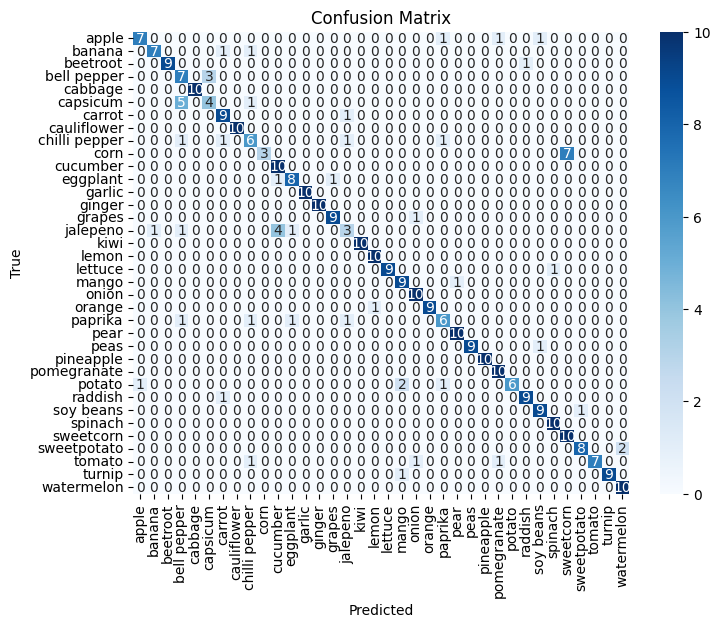

In [8]:
# ===============================
# STEP 6: EVALUATION ON TEST DATA
# ===============================
test_loss, test_acc = transfer_model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

# Get predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(transfer_model.predict(test_ds), axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [20]:



# ===============================
# STEP 7: SAVE FINAL MODEL
# ===============================
#transfer_model.save("Image_classify.keras")
# Save model in Keras format
transfer_model.save("C:/Users/Baha/Downloads/Image_classification2/image_classification.keras")

# Or save in HDF5 format
# model.save("C:/Users/Baha/Downloads/Image_classification2/image_classification.h5")

print("Model saved!")


Model saved!
